# **D3TOP – Tópicos em Ciência de Dados**
> **Alunas:** Mariana Cabride (CP3016615) e Renata Rabelo (CPCP301634X)



## **Carregamento dos dados**

In [ ]:
import sys
print(sys.version)

3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]


In [ ]:
import pandas as pd
print(pd.__version__)

1.5.3


In [ ]:
# Upload from Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!pip install gensim

#import gensim.downloader as api

#!pip install pycaret

In [ ]:
# Read
dfNLP = pd.read_csv("/content/drive/MyDrive/Pós-Graduação/3o Semestre/D3TOP - NLP/Trabalho D3TOP/Copy_df3_data_NLP.csv")
df_completo = pd.DataFrame(dfNLP)

# Limpeza de dados, retirando 11 observações onde Score < 0
df_sem_zeros = df_completo[df_completo['Score'] > 41]
df_sem_zeros.to_csv('/content/drive/MyDrive/Pós-Graduação/3o Semestre/D3TOP - NLP/Trabalho D3TOP/df_final.csv')
# Read
dfNLP2 = pd.read_csv("/content/drive/MyDrive/Pós-Graduação/3o Semestre/D3TOP - NLP/Trabalho D3TOP/df_final.csv")
df_final = pd.DataFrame(dfNLP2)

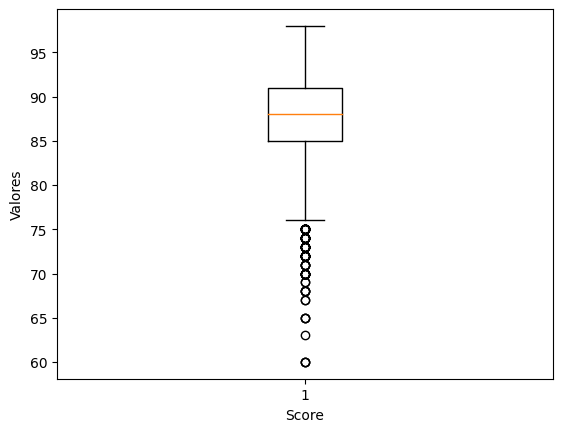

In [ ]:
# Distribuiçao da variável Score
import matplotlib.pyplot as plt

# Extrair a coluna "Score" do DataFrame
scores = df_final['Score']

# Criar o boxplot
plt.boxplot(scores)

# Configurar os rótulos dos eixos
plt.xlabel('Score')
plt.ylabel('Valores')

# Exibir o gráfico
plt.show()


# Dividindo a base em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_final, test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# by default, it performs: lowercasing, remove punctuation, strip accents
tfidf = TfidfVectorizer()

X_train = tfidf.fit_transform(df_train['no_commas_Description_01'])
y_train = df_train['Score']

X_test = tfidf.transform(df_test['no_commas_Description_01'])
y_test = df_test['Score']

# Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

# Métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimindo as métricas de avaliação
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 41.153297990837075
Mean Absolute Error (MAE): 5.0816932613151815
R-squared (R2) Score: -0.7278357486460516


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor


# Criando o modelo de Random Forest
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinando o modelo
random_forest.fit(X_train, y_train)

# Realizando previsões nos dados de teste
y_pred = random_forest.predict(X_test)

# Métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimindo as métricas de avaliação
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 13.685533490614192
Mean Absolute Error (MAE): 2.7240601113642113
R-squared (R2) Score: 0.3817505730604792


# XGBoost

In [ ]:
import xgboost as xgb

# Convertendo os dados para o formato DMatrix exigido pelo XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Parâmetros do modelo
params = {
    'objective': 'reg:squarederror',
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse',
    'seed': 42
}

# Treinando o modelo
model = xgb.train(params, dtrain, num_boost_round=100)

# Realizando previsões nos dados de teste
y_pred = model.predict(dtest)

# Métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimindo as métricas de avaliação
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 14.886845241489395
Mean Absolute Error (MAE): 2.9540766988999025
R-squared (R2) Score: 0.3749705455311543


# Support Vector Regression

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


# Criando o modelo SVR
model = SVR(kernel='rbf')

# Treinando o modelo
model.fit(X_train, y_train)

# Realizando previsões nos dados de teste
y_pred = model.predict(X_test)

# Métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimindo as métricas de avaliação
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 14.771073767414373
Mean Absolute Error (MAE): 2.8641563721757883
R-squared (R2) Score: 0.3327108586414719


# LightGBM

In [ ]:
import lightgbm as lgb

# Convertendo os dados para o formato Dataset exigido pelo LightGBM
train_data = lgb.Dataset(X_train, label=y_train)

# Parâmetros do modelo
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 50,
    'max_depth': 100,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'seed': 42
}

# Treinando o modelo
model = lgb.train(params, train_data, num_boost_round=100)

# Realizando previsões nos dados de teste
y_pred = model.predict(X_test)

# Métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimindo as métricas de avaliação
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.087751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 54435
[LightGBM] [Info] Number of data points in the train set: 5267, number of used features: 1395
[LightGBM] [Info] Start training from score 87.686919
Mean Squared Error (MSE): 12.344799615271842
Mean Absolute Error (MAE): 2.611455980840512
R-squared (R2) Score: 0.44231875994755177


# GridSearch LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Convertendo os dados para o formato Dataset exigido pelo LightGBM
train_data = lgb.Dataset(X_train, label=y_train)

# Definindo os parâmetros fixos
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'seed': 42
}

# Definindo os hiperparâmetros a serem testados
grid_params = {
    'num_leaves': [20, 30, 50],
    'max_depth': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'feature_fraction': [0.6, 0.8, 1.0],
    'bagging_fraction': [0.6, 0.8, 1.0],
    'bagging_freq': [3, 5, 7]
}

# Criando o modelo base
base_model = lgb.LGBMRegressor(**params)

# Criando o objeto GridSearchCV
grid_search = GridSearchCV(estimator=base_model, param_grid=grid_params, cv=3, scoring='neg_mean_squared_error')

# Realizando a pesquisa em grade
grid_search.fit(X_train, y_train)

# Obtendo os melhores hiperparâmetros e o melhor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizando previsões no conjunto de teste usando o melhor modelo
y_pred = best_model.predict(X_test)

# Métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimindo as métricas de avaliação
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)
print("Best Parameters:", best_params)


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will b

KeyboardInterrupt: ignored

In [ ]:
#Resultado de gridsearch
# Best Parameters: {'bagging_fraction': 1.0, 'bagging_freq': 3, 'feature_fraction': 0.6, 'learning_rate': 0.1, 'max_depth': 50, 'num_leaves': 30}


# LightGBM após GridSearch

In [ ]:
import lightgbm as lgb

# Convertendo os dados para o formato Dataset exigido pelo LightGBM
train_data = lgb.Dataset(X_train, label=y_train)

# Parâmetros do modelo
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 30,
    'max_depth': 50,
    'learning_rate': 0.1,
    'feature_fraction': 0.6,
    'bagging_fraction': 1.0,
    'bagging_freq': 3,
    'seed': 42
}

# Treinando o modelo
model = lgb.train(params, train_data, num_boost_round=100)

# Realizando previsões nos dados de teste
y_pred = model.predict(X_test)

# Métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimindo as métricas de avaliação
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.084921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 54216
[LightGBM] [Info] Number of data points in the train set: 5267, number of used features: 1395
[LightGBM] [Info] Start training from score 87.685400
Mean Squared Error (MSE): 12.618538765073504
Mean Absolute Error (MAE): 2.714078297094247
R-squared (R2) Score: 0.4702061939525609


In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# Recebe o input do usuário
entrada = input("Digite uma string: ")

# Adiciona a string como uma nova observação no DataFrame existente
df_final = df_final.append({'Description': entrada}, ignore_index=True)


# Faz a previsão para a nova observação
nova_observacao = df_final.iloc[-1]['Description']
previsao = model.predict([nova_observacao])

# Imprime a previsão
print("Previsão:", previsao)


Digite uma string: very good


<ipython-input-158-51bb44ac93e4>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'Description': entrada}, ignore_index=True)


NotFittedError: ignored

In [ ]:


# Recebe o input do usuário
entrada = input("Digite uma string: ")

# Adiciona a string como uma nova observação no DataFrame existente
df_final = df_final.append({'Description': entrada}, ignore_index=True)


# Faz a previsão para a nova observação
nova_observacao = df_final.iloc[-1]['Description']
previsao = model.predict([nova_observacao])

# Imprime a previsão
print("Previsão:", previsao)


Digite uma string: good


<ipython-input-161-1ab249a6c364>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'Description': entrada}, ignore_index=True)


NotFittedError: ignored